<h1 style="color:blue;", align="center">Taller 8</h1>
<h3 style="color:blue;", align="justify">Técnicas Avanzadas de Machine Learning y Minería de Datos</h3>

<h4 style="color:purple;", align="left">Carlos Mauricio Moreno Rojas</h4>
<h4 style="color:purple;", align="left">Miller Alexander Quiroga Campos</h4>

<h4 style="color:purple;", align="left">=========================</h4>


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
# Lectura del CSV a un DataFrame
df = pd.read_csv('temps.csv')
df.shape

(348, 12)

In [3]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [5]:
#Matriz de estadística de las variables
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


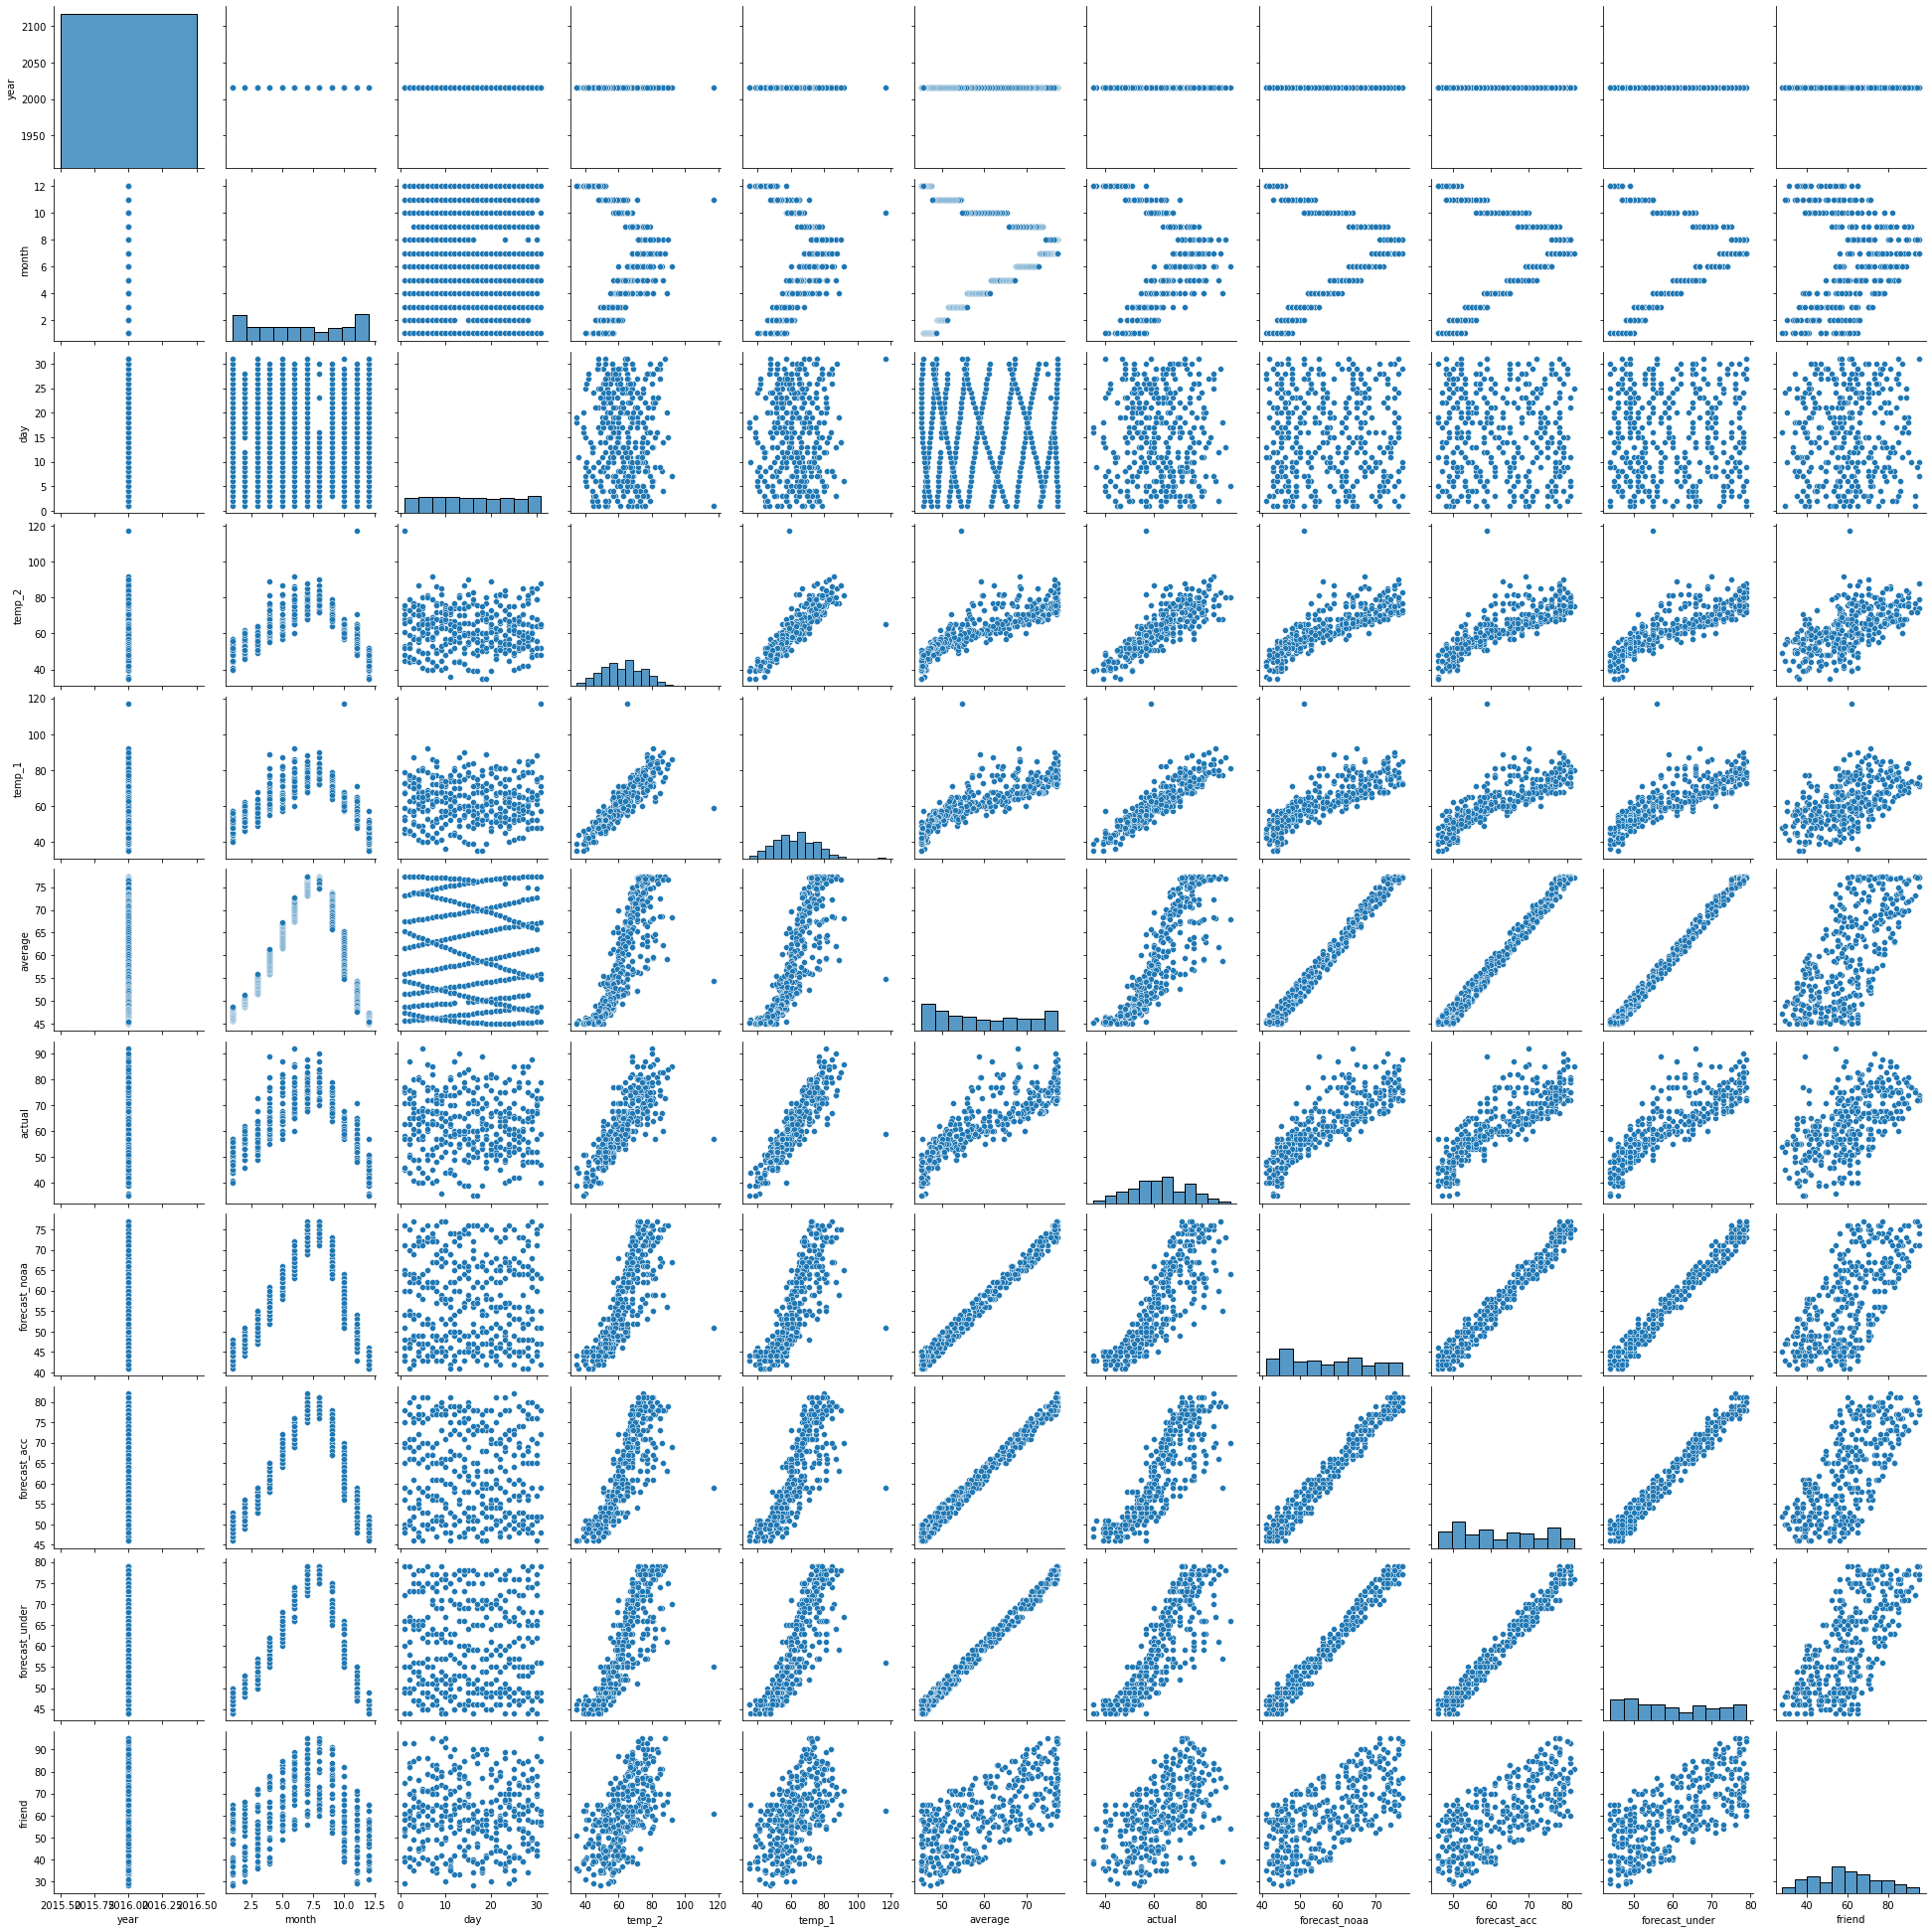

In [6]:
# matriz de correlacion con graficos entre variables
sns.pairplot(df)

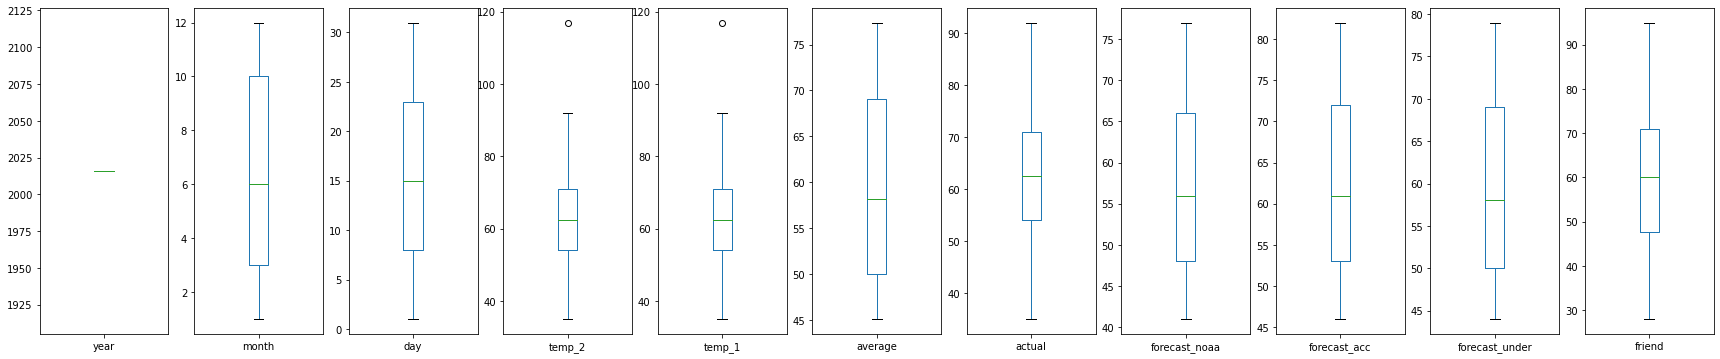

In [7]:
# Analizo las variables por medio de diagrama de cajas y bigotes
df.plot(kind = 'box', subplots = True, figsize = (30,6));

In [8]:
# Remplazo los dos valores atípicos por el valor de la moda...

df.loc[(df.temp_2 == 117),'temp_2'] = int(df['temp_2'].mode())  # reemplaza datos atípicos por la Moda de los datos
df.loc[(df.temp_1 == 117),'temp_1'] = int(df['temp_2'].mode())  # reemplaza datos anomalos por la Moda de los datos

In [9]:
df['temp_1'].mode()

0    60
dtype: int64

In [10]:
# Verifico de nuevo la descriptiva con los nuevos datos
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.488506,62.537356,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,11.810091,11.764563,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.000000,62.000000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


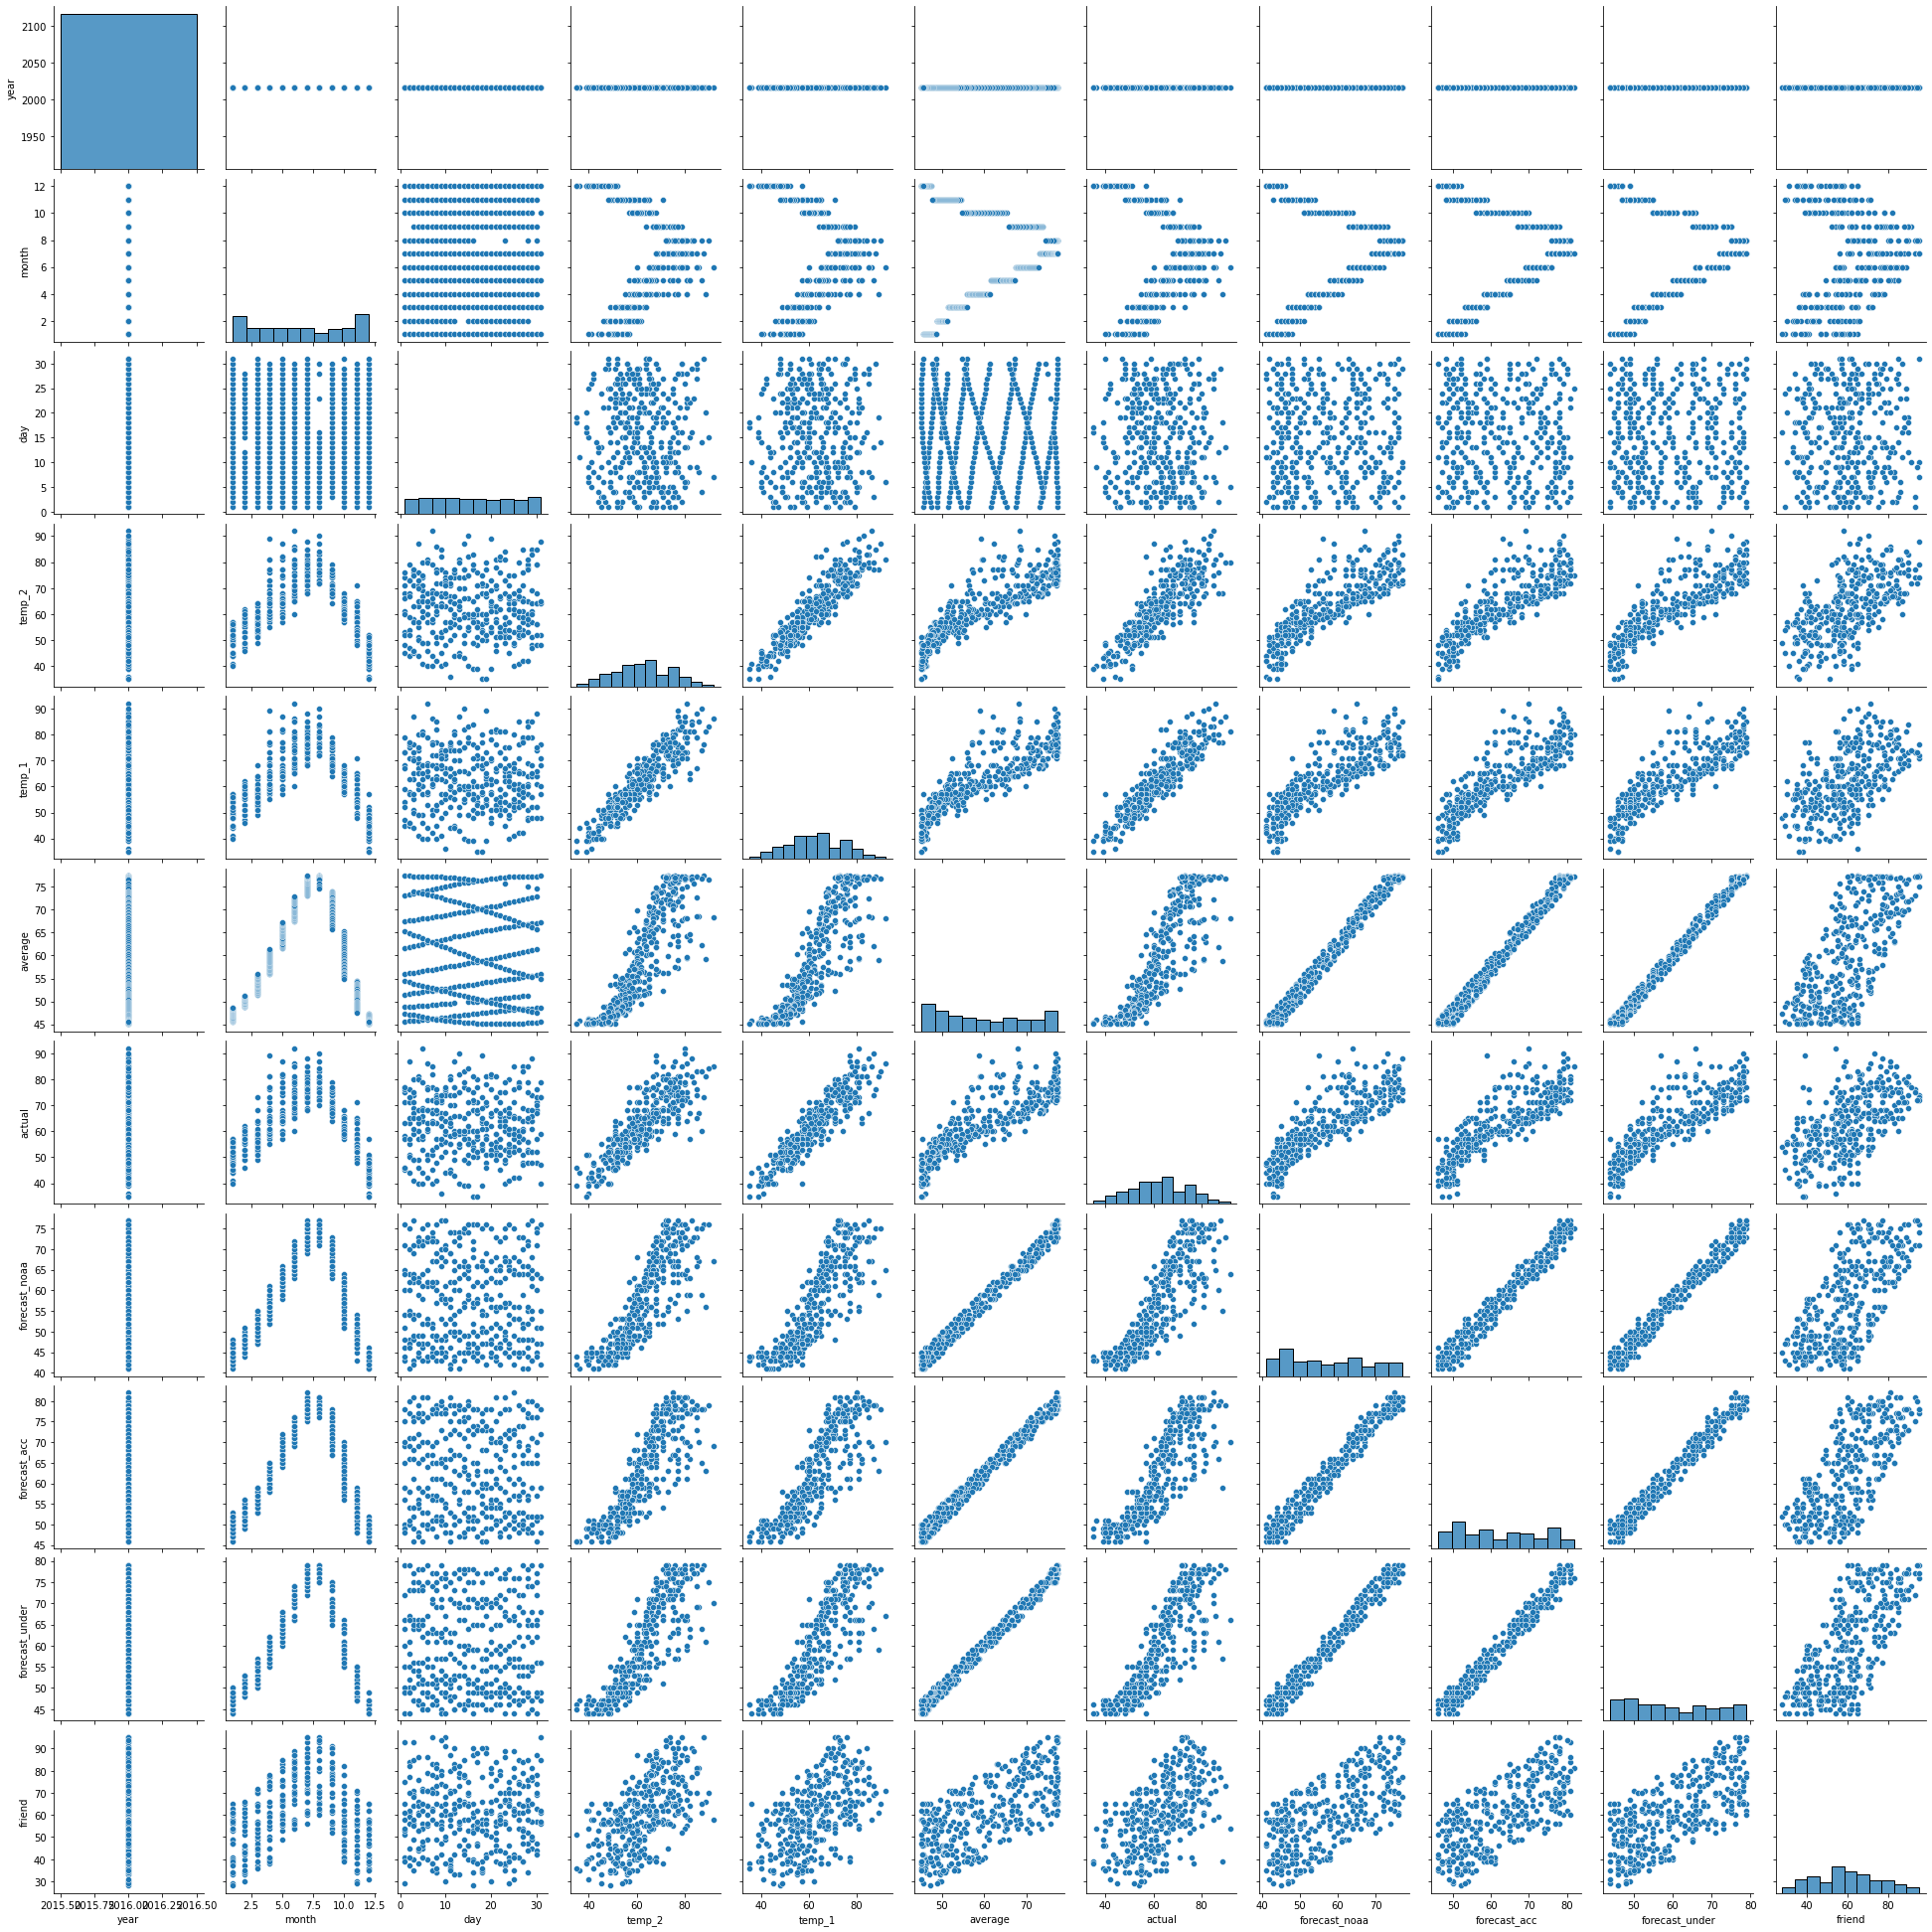

In [11]:
sns.pairplot(df)

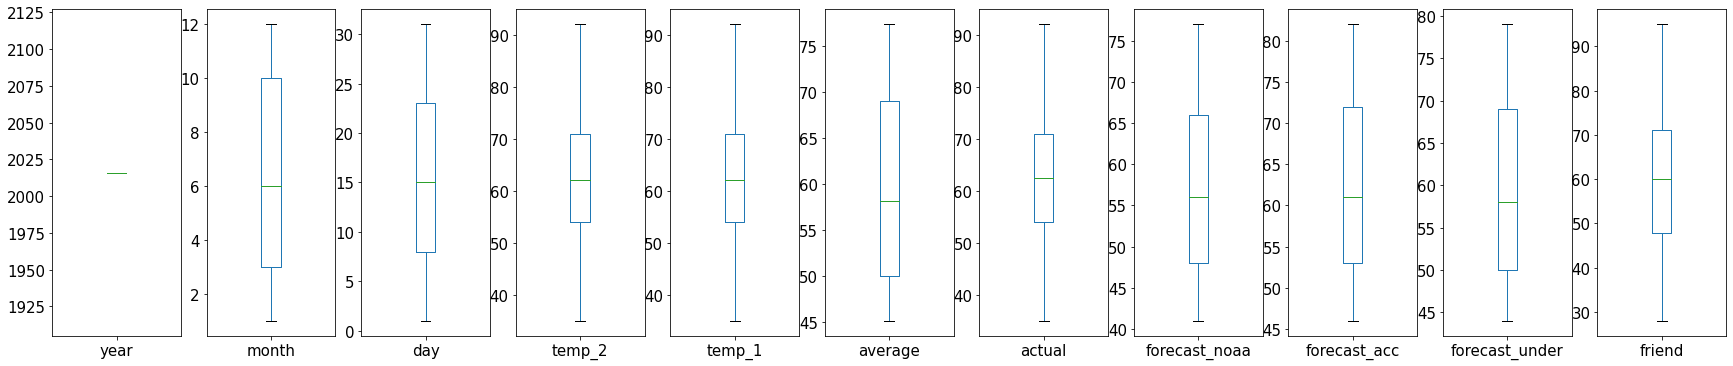

In [14]:
df.plot(kind = 'box', subplots = True, figsize = (30,6), fontsize = 15);

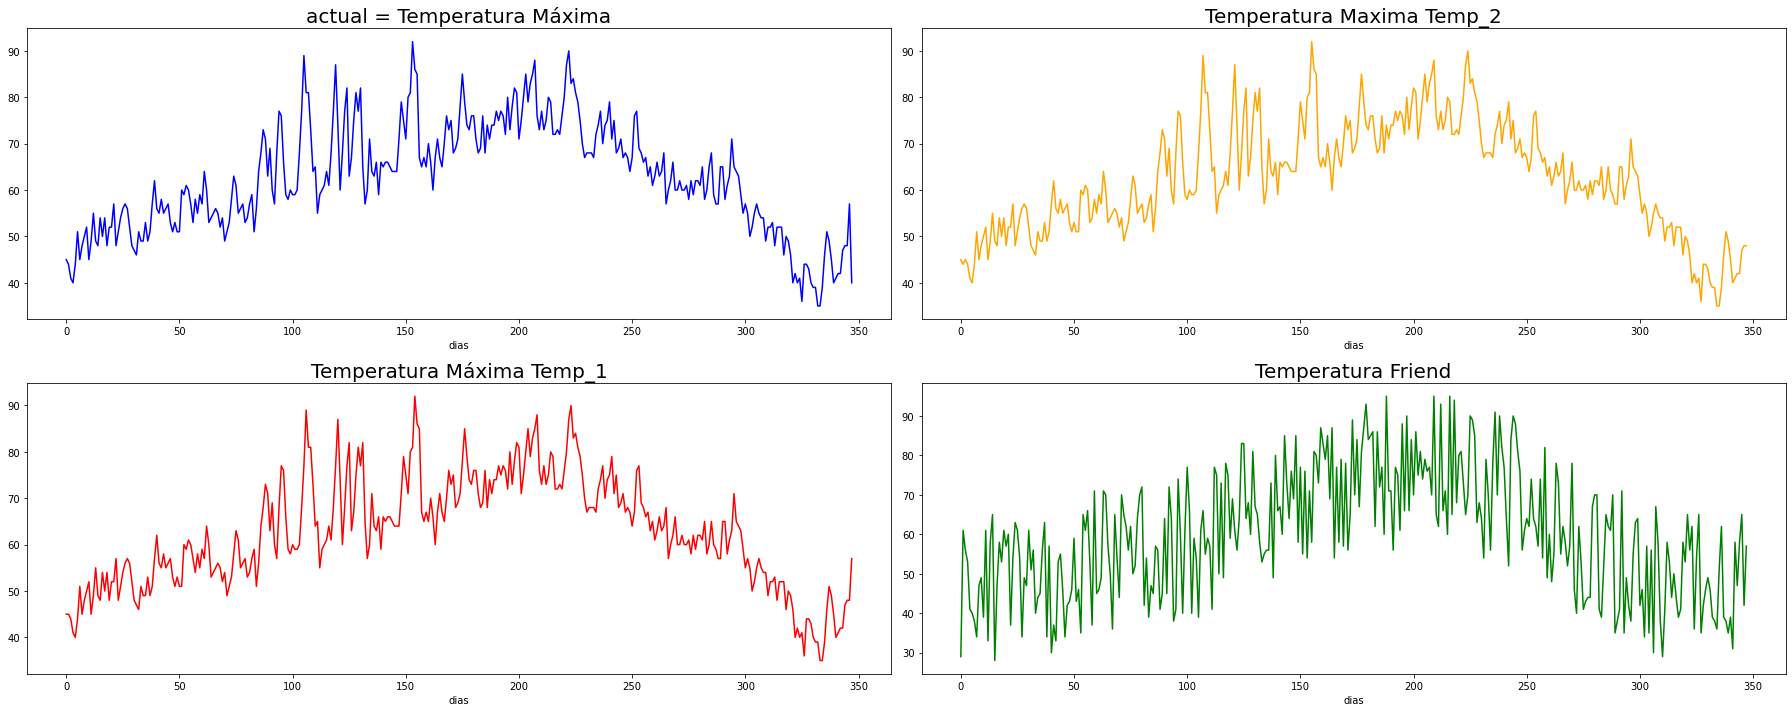

In [15]:
# Grafico de las 4 variables de Temperatura

fig, axs = plt.subplots(2, 2, figsize = (25,10))
axs[0, 0].plot(df.index, df.actual, c = 'Blue')
axs[0, 0].set_title("actual = Temperatura Máxima", fontsize = 20)
axs[0, 0].set_xlabel('dias')

axs[1, 0].plot(df.index, df.temp_1, c = 'Red')
axs[1, 0].set_title("Temperatura Máxima Temp_1", fontsize = 20)
axs[1, 0].sharex(axs[0, 0])
axs[1, 0].set_xlabel('dias')

axs[0, 1].plot(df.index, df.temp_2, c = 'Orange')
axs[0, 1].set_title("Temperatura Maxima Temp_2", fontsize = 20)
axs[0, 1].set_xlabel('dias')

axs[1, 1].plot(df.index, df.friend, c = 'Green')
axs[1, 1].set_title("Temperatura Friend", fontsize = 20)
axs[1, 1].set_xlabel('dias')

fig.tight_layout()

<AxesSubplot:>

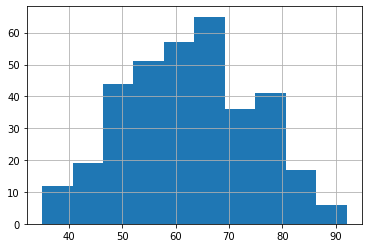

In [16]:
df['actual'].hist()

<AxesSubplot:>

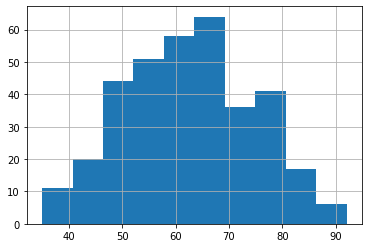

In [17]:
df['temp_1'].hist()

<AxesSubplot:>

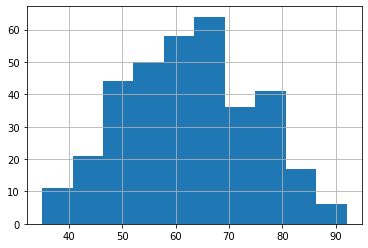

In [18]:
df['temp_2'].hist()

<AxesSubplot:>

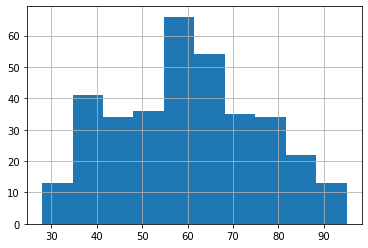

In [19]:
df['friend'].hist()

In [20]:
# preparando data
df2 = df.copy()
df2 = pd.get_dummies(df2) # Normalización de los datos
df2

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


In [21]:
# borrando las variables que no aportan:
df2 = df2.drop(['forecast_noaa', 'forecast_acc', 'forecast_under'], axis=1)
df2

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,42,1,0,0,0,0,0,0


In [22]:
# display de las 5 primeras filas y las ultimas doce columnas para verificar lel resultado del get-dummies
df2.iloc[:,5:].head()

,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,29,1,0,0,0,0,0,0
1,45.7,44,61,0,0,1,0,0,0,0
2,45.8,41,56,0,0,0,1,0,0,0
3,45.9,40,53,0,1,0,0,0,0,0
4,46.0,44,41,0,0,0,0,0,1,0


In [23]:
df2.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [24]:
y = np.array(df2['actual'])  # definiendo la variable objetivo o dependiente como array
df2 = df2.drop('actual', axis = 1)  # removiendo variable objetivo del df2

x_list = list(df2.columns)  # creando lista con nombre de variables independientes
df2 = np.array(df2) # conviertiendo df a array de variables independientes

In [25]:
# preparando data para regresion
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df2, y, test_size = 0.35, random_state = 50)

In [26]:
# La linea base de predicciones son los promedios historicos x dia 'average'
linea_base = test_x[:, x_list.index('average')]

In [27]:
# error = average - y (test)
error_linea_base = abs(linea_base - test_y)

print('Error_linea_base promedio: ', round(np.mean(error_linea_base), 3), 'grados.')
# Error_linea_base promedio:  4.905

Error_linea_base promedio:  4.905 grados.


In [28]:
# ajuste del modelo con datos de entrenamiento

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 50)
regressor.fit(train_x, train_y)
print(regressor.score(train_x, train_y))

0.9777008730087922


In [29]:
# predicción con los datos de testing
forecast = regressor.predict(test_x)

In [30]:
# Metricas de desempeño

# Calculo del valor absoluto del error
errors = abs(forecast - test_y)
error2 = (forecast - test_y)**2
np.mean(error2) # error cuadratico medio
np.sqrt(np.mean(error2)) # std error cuadratico medio

# Error Promedio
print('Mean Absolute Error:', round(np.mean(errors), 3), 'grados.')
# Mean Absolute Error: 3.399 grados.

Mean Absolute Error: 3.551 grados.


In [31]:
# Calculo de vector de errores relativos del valor absoluto del error

error_mean = 100 * (errors / test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(error_mean)
print('Accuracy:', round(accuracy, 3), '%.')

Accuracy: 94.371 %.


##  Analisis de sensibilidad

In [32]:
######  Analisis de sensibilidad

#!pip install pydotplus
#!conda install python-graphviz
import pydotplus
# Importando librerias para visualizacion
from sklearn.tree import export_graphviz

In [33]:
arbol = regressor.estimators_[15]
# definiendo ruta para graphviz
os.environ['PATH'] = os.environ['PATH']+';' + r'C:\Users\lpren\anaconda3\Library\bin\graphviz'

# Exportando archivo *.dot
export_graphviz(arbol, out_file="tree2" + ".dot", feature_names =  x_list)
# Generando archivo *.dot
dot_data = export_graphviz(arbol, out_file=None, feature_names = x_list)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
graph.write_png("tree2" + "_gv.png")

True

In [34]:
# Limitando profundidad del arbol a 3 niveles
regressor_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
regressor_small.fit(train_x, train_y)
# Extrayendo el arbol pequeño
arbol_small = regressor_small.estimators_[5]

In [35]:
# Exportando archivo *.dot
export_graphviz(arbol, out_file="small-tree" + ".dot", feature_names =  x_list)
# Generando *.dot
dot_data = export_graphviz(arbol_small, out_file=None, feature_names = x_list)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
# Generando *.png
graph.write_png("small-tree" + "_gv.png")



True

In [36]:
# obtencion de numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) \
                       for feature, importance in zip(x_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) \
 for pair in feature_importances];

Variable: average              Importance: 0.46
Variable: temp_1               Importance: 0.42
Variable: temp_2               Importance: 0.03
Variable: month                Importance: 0.02
Variable: day                  Importance: 0.02
Variable: friend               Importance: 0.02
Variable: week_Mon             Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [37]:
# Nuevo random forest con las 2 variables mas importantes
regressor_most_important = RandomForestRegressor(n_estimators= 1000, random_state=50)
# Extract the two most important features
important_indices = [x_list.index('temp_1'), x_list.index('average')]
train_important = train_x[:, important_indices]
test_important = test_x[:, important_indices]
# Train the random forest
regressor_most_important.fit(train_important, train_y)
# Make predictions and determine the error
predictions = regressor_most_important.predict(test_important)
errors_mi = abs(predictions - test_y)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors_mi), 2), 'degrees.')
mape = np.mean(100 * (errors_mi / test_y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.55 degrees.
Accuracy: 94.34 %.


In [40]:
Y=y.reshape(len(y),1)

sc_X = StandardScaler()     # define a sc_X como una variable tipo Clase StandardScaler
sc_Y = StandardScaler() 
    # define a sc_Y como una variable tipo Clase StandardScaler

X = sc_X.fit_transform(df2)   # Normaliza la escala de X mediante estandarizacion X = (X - Xmean)/Xstd
Y = sc_Y.fit_transform(Y)   # Normaliza la escala de Y mediante estandarizacion Y = (Y - Ymean)/Ystd

Y2 = Y.ravel()

In [46]:
#%% Máquina de Soporte Vectorial
from sklearn.svm import SVR

c=1
epsi = 0.01
regressor1 = SVR(kernel='rbf', C=c, epsilon=epsi) # Kernel function = Radial basis function
grado = 3                                        # Define el grado del polinomio
grado2 = 5                                       # Define el grado del polinomio
regressor2 = SVR(kernel ='poly', degree=grado) # Kernel function = Polinomio grado de acuerdo a variable grado
regressor3 = SVR(kernel ='poly', degree=grado2) # Kernel function = Polinomio grado de acuerdo a variable grado2
regressor4 = SVR(kernel ='linear')
# Entrenamiento de los modelos SVR con todo el dataset de level y salario
# regressor.fit(X,Y) # Warning para que se use Ravel
regressor1.fit(X,Y.ravel())
regressor2.fit(X,Y.ravel())
regressor3.fit(X,Y.ravel())
regressor4.fit(X,Y.ravel())

SVR(kernel='linear')

In [47]:
#%% 
#Árbol de Decisión
from sklearn.tree import DecisionTreeRegressor
regressor5 = DecisionTreeRegressor(random_state = 0)
regressor5.fit(X, Y)

DecisionTreeRegressor(random_state=0)

In [48]:
#%%
# regresion multilineal
from sklearn.linear_model import LinearRegression
regressor6 = LinearRegression().fit(X, Y)

In [49]:
#%%

import scipy.stats

#Promedio de la variable dependiente
suma=0
for i in range(len(y)):
    suma+=y[i]
suma /= len(Y)
Y_prom = suma
print(Y_prom)

62.543103448275865


In [50]:
# Suma total de cuadrados
def STCC(y,y_prom):
    rango = len(y)
    suma = 0
    for i in range(rango):
        suma+=(y[i]-y_prom)**2
    return suma

In [51]:
def SCE(y, y_cal):
    rango = len(y_cal)
    suma = 0
    for i in range(rango):
        suma+=(y[i]-y_cal[i])**2
    return suma

In [52]:
# Creando la tabla resumen para ANOVA TEST

n = 10  # Filas
m = 8  # Columnas
lista = [0] * n
for i in range(n):
    lista[i] = [0] * m

# Titulos 1ra Fila
lista[0][0]="Param. / Modelo"
lista[0][1]="Random Forest"
lista[0][2]="rbf"
lista[0][3]="Pol grado 3"
lista[0][4]="Pol grado 5"
lista[0][5]="svr-linear"
lista[0][6]="DTR"
lista[0][7]="Multilineal"

# Titulos 1ra Columna
lista[1][0]="STCC"
lista[2][0]="SCE"
lista[3][0]="SCR"
lista[4][0]="n"
lista[5][0]="k"
lista[6][0]="S^2"
lista[7][0]="F"
lista[8][0]="p-Value"
lista[9][0]="r^2"

In [56]:
y_cal1=sc_Y.inverse_transform(regressorA.predict(X))
y_cal2=sc_Y.inverse_transform(regressor1.predict(X))
y_cal3=sc_Y.inverse_transform(regressor2.predict(X))
y_cal4=sc_Y.inverse_transform(regressor3.predict(X))
y_cal5=sc_Y.inverse_transform(regressor4.predict(X))
y_cal6=sc_Y.inverse_transform(regressor5.predict(X))
y_cal7=sc_Y.inverse_transform(regressor6.predict(X))

In [57]:
def llenar_lista(i,Y_real,Y_PROM,Y_CAL,N,n,k):

    global X
    global Y
    global lista

    for j in range(1,N):
        
        if j == 1:
            lista[j][i]=STCC(Y_real,Y_PROM)
        if j == 2:
            lista[j][i]=SCE(Y_real, Y_CAL)
        if j == 3:
            lista[j][i]=lista[j-2][i]-lista[j-1][i]
        if j == 4:
            lista[j][i]=n            
        if j == 5:
            lista[j][i]=k
        if j == 6:
            lista[j][i]=lista[j-4][i]/(lista[j-2][i]-lista[j-1][i]-1)
        if j == 7:
            lista[j][i]=lista[j-4][i]/lista[j-2][i]/lista[j-1][i]
        if j == 8:
            p_value = 1-scipy.stats.f.cdf(lista[j-1][i], k, (n-k-1))
            lista[j][i]=p_value
        if i == 1:
            lista[9][i]= regressorA.score(X,Y2)
        elif i == 2:
            lista[9][i]= regressor1.score(X,Y)
        elif i == 3:
            lista[9][i]= regressor2.score(X,Y)
        elif i == 4:
            lista[9][i]= regressor3.score(X,Y)
        elif i == 5:
            lista[9][i]= regressor4.score(X,Y)
        elif i == 6:
            lista[9][i]= regressor5.score(X,Y)
        else:
            lista[9][i]= regressor6.score(X,Y)
    print("lista llena")

In [58]:
llenar_lista(1,y,Y_prom,y_cal1,10,len(y),1)
llenar_lista(2,y,Y_prom,y_cal2,10,len(y),1)
llenar_lista(3,y,Y_prom,y_cal3,10,len(y),1)
llenar_lista(4,y,Y_prom,y_cal4,10,len(y),1)
llenar_lista(5,y,Y_prom,y_cal5,10,len(y),1)
llenar_lista(6,y,Y_prom,y_cal6,10,len(y),1)
llenar_lista(7,y,Y_prom,y_cal7,10,len(y),1)

lista llena
lista llena
lista llena
lista llena
lista llena
lista llena
lista llena


<ipython-input-57-fd7653e9ad8c>:22: RuntimeWarning: divide by zero encountered in double_scalars
  lista[j][i]=lista[j-4][i]/lista[j-2][i]/lista[j-1][i]


In [60]:
from tabulate import tabulate
print(tabulate(lista, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════╤═════════════════╕
│ Param. / Modelo   │   Random Forest │             rbf │     Pol grado 3 │     Pol grado 5 │      svr-linear │     DTR │     Multilineal │
╞═══════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════╪═════════════════╡
│ STCC              │ 48268.4         │ 48268.4         │ 48268.4         │ 48268.4         │ 48268.4         │ 48268.4 │ 48268.4         │
├───────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────┼─────────────────┤
│ SCE               │  1100.72        │  5758.4         │  6111.72        │  4769.14        │  7288.08        │     0   │  7137.03        │
├───────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────┼─────────────────┤
│ SCR               